In [591]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

In [592]:
waveform = np.loadtxt('../piano_chord.csv')  # Replace with your CSV filename
waveform.shape
waveform = waveform

In [593]:
# Sampling parameters
sample_rate = 44100  # Assume standard audio sample rate of 44.1 kHz
n = len(waveform)  # Number of samples
duration = n / sample_rate  # Duration in seconds

In [594]:
time = np.linspace(0, duration, n)

yf = fft(waveform)
xf = fftfreq(n, 1 / sample_rate)

In [595]:
def plot_waveform_and_spectrum(time, waveform, xf, yf):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [1, 0.7]})

    # Waveform plot
    waveform_every_n = 1  # Plot every n-th sample to prevent clutter
    ax1.plot(time[::waveform_every_n], waveform[::waveform_every_n], color='#1f77b4', linewidth=1.2)
    ax1.set_title('Waveform', fontsize=16, fontweight='bold')
    ax1.set_xlabel('Time (s)', fontsize=12)
    ax1.set_ylabel('Amplitude', fontsize=12)
    ax1.grid(True, linestyle='--', alpha=0.5)

    # Frequency Spectrum plot (Magnitude only)
    ax2.plot(xf[:n // 2], np.abs(yf[:n // 2]) / n, color='#ff7f0e', linewidth=1.2)
    ax2.set_title('Frequency Spectrum', fontsize=16, fontweight='bold')
    ax2.set_xlabel('Frequency (Hz)', fontsize=12)
    ax2.set_ylabel('Magnitude', fontsize=12)
    ax2.grid(True, linestyle='--', alpha=0.5)
    ax2.set_xlim(0, sample_rate / 2)  # Only show positive frequencies

    # Aesthetic adjustments
    plt.subplots_adjust(hspace=0.4)
    fig.suptitle('Waveform and Frequency Spectrum Analysis', fontsize=18, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    plt.show()


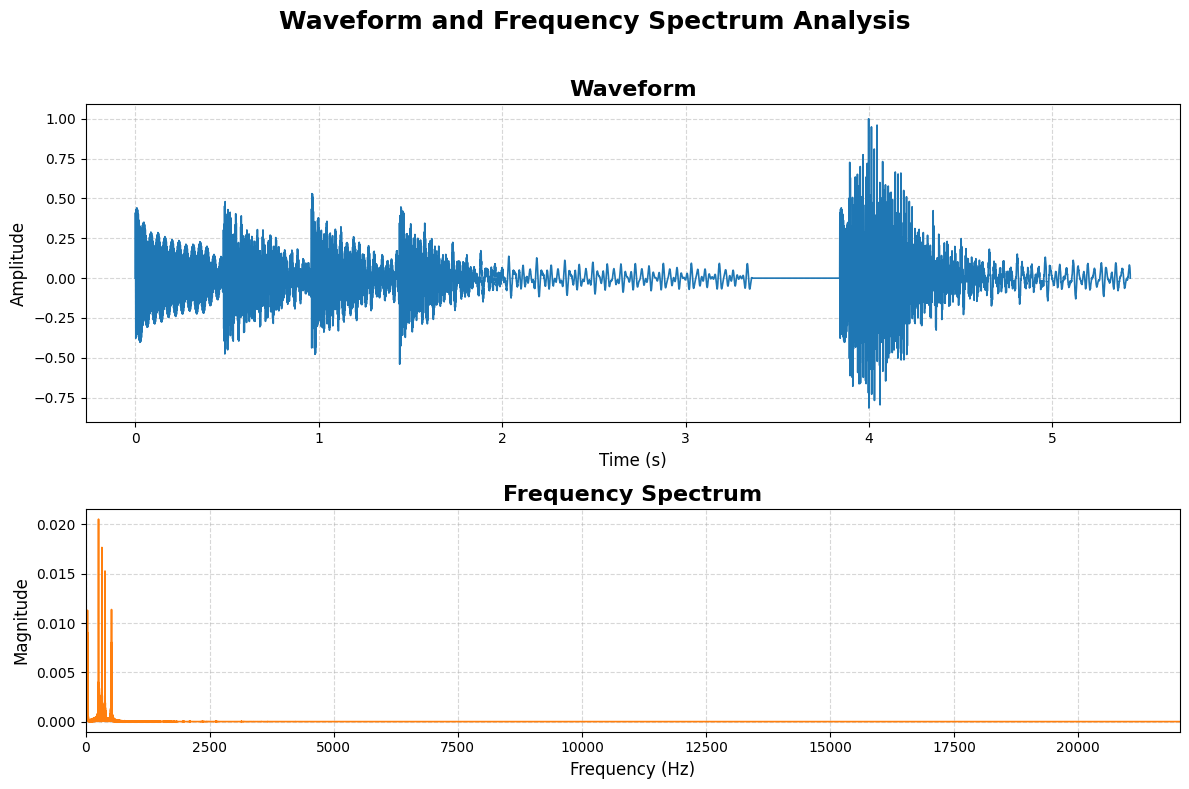

In [596]:
plot_waveform_and_spectrum(time, waveform, xf, yf)